# Acceptance - rejection method

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

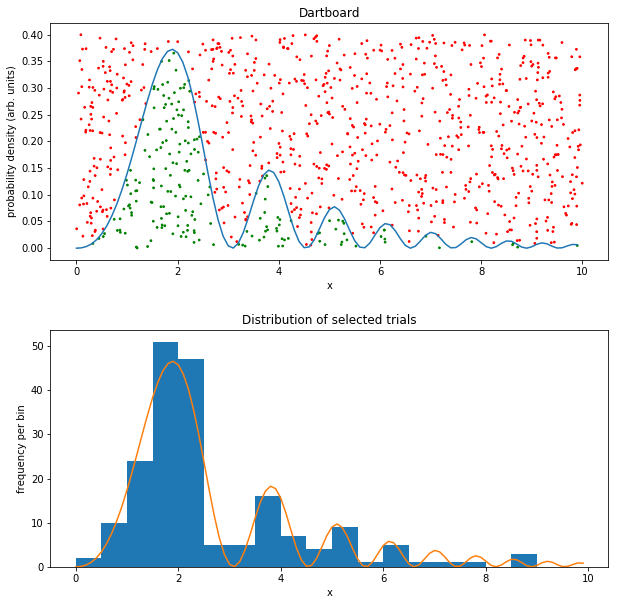

The integral of function is approximately 0.77


In [3]:
def funky(x):
    return np.power(np.sin(x/4.+x*x/4.),2)*np.exp(-x/2)

# acceptance rejection method
xMax = 10.
nDarts = 1000
fBig = 0.4
x, y = np.random.rand(2,nDarts)
x *= xMax
y *= fBig
# check which darts are below the curve - accept those
inside = funky(x)>y
color = ['red']*nDarts
xAcc =[]
for i in range(nDarts):
    if inside[i]:
        color[i]='green'
        xAcc.append(x[i])
nAcc = len(xAcc)        

integral = nAcc/nDarts*fBig*xMax; 

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.3)

plt.subplot(2,1,1)
xArray = np.arange(0.,xMax,xMax/100)
func = funky(xArray)
plt.plot(xArray,func)
plt.scatter(x,y,s=3,color=color)
plt.title("Dartboard"); plt.xlabel("x"); plt.ylabel("probability density (arb. units)")

plt.subplot(2,1,2)
plt.hist(xAcc,bins=np.arange(0.,xMax,xMax/20));
# to compare to pdf need to normalize function using approximate integral
plt.plot(xArray,func/integral*nAcc*xMax/20)
plt.title("Distribution of selected trials"); plt.xlabel("x"); plt.ylabel("frequency per bin")

plt.show()

print("The integral of function is approximately %4.2f" %(integral))